<a href="https://colab.research.google.com/github/FelipeFerAl/TAM-2025-2/blob/main/ClassExercises/TAM_040925.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyección lineal de Vectores

##Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Solución Analítica
Se plantean dos vectores de dos dimensiones con los cuales aplicamos la fórmula $ \frac{<Xn,Xm>}{\parallel Xm\parallel}$ para obtener el valor escalar que realiza la proyección en base al producto punto entre ambos vectores y la norma del vector sobre el cual se proyecta


In [17]:
# 1. Define two 2D NumPy arrays representing the vectors.
vector_a = np.array([3, 2])
vector_b = np.array([4, 0])

# 2. Calculate the dot product of vec1 and vector_b.
dot_product_ab = np.dot(vector_a, vector_b)

# 3. Calculate the dot product of vector_b with itself (the squared magnitude of vector_b).
dot_product_bb = np.dot(vector_b, vector_b)

# 4. Calculate the scalar projection of vector_a onto vector_b.
scalar_projection = dot_product_ab / dot_product_bb

# 5. Calculate the vector projection.
vector_projection_analytic = scalar_projection * vector_b

print("Scalar projection of a onto b (Analytic):", scalar_projection)

Scalar projection of a onto b (Analytic): 0.75


##Solución Iterativa
Para este caso se toma un learning rate que determina los pasos que debe tomar nuestro modelo, y en base a un número de iteraciones intenta acercarse al escalar necesario por medio de la fórmula $\alpha_{t-1}-\eta\frac{\partial\parallel Xn-\alpha Xm\parallel_{2}^{2}}{\partial \alpha_{t-1}}$. Donde $η$ corresponde al valor fijo que se entiende como el paso durante la búsqueda del mínimo (Learning rate). La derivada parcial se entiende como el gradiente descendiente que se puede reescribir como $-2*(<Xn,Xm>-α<Xm,Xm>)$

In [28]:
# 1. Initialize scalar_projection_iterative and a list to store the history
scalar_projection_iterative = 0.0
scalar_projection_history = [scalar_projection_iterative] # Store initial value

# 2. Define learning rate
learning_rate = 0.01

# 3. Define number of iterations
num_iterations = 10     #Reduced

# 4. Implement the loop
for i in range(num_iterations):
  # 5. Calculate the gradient of the cost function
  gradient = -2 * (np.dot(vector_a, vector_b) - scalar_projection_iterative * np.dot(vector_b, vector_b))

  # 6. Update scalar_projection_iterative
  scalar_projection_iterative = scalar_projection_iterative - learning_rate * gradient

  # 7. Store the updated scalar projection
  scalar_projection_history.append(scalar_projection_iterative)


# 8. Calculate the iterative vector projection
vector_projection_iterative = scalar_projection_iterative * vector_b

# 9. Print the results
print("\nScalar projection of a onto b (iterative):", scalar_projection_iterative)


Scalar projection of a onto b (iterative): 0.7341455788488209


##Comparación de resultados

Difference between analytic and iterative scalar projections: 0.015854421151179077


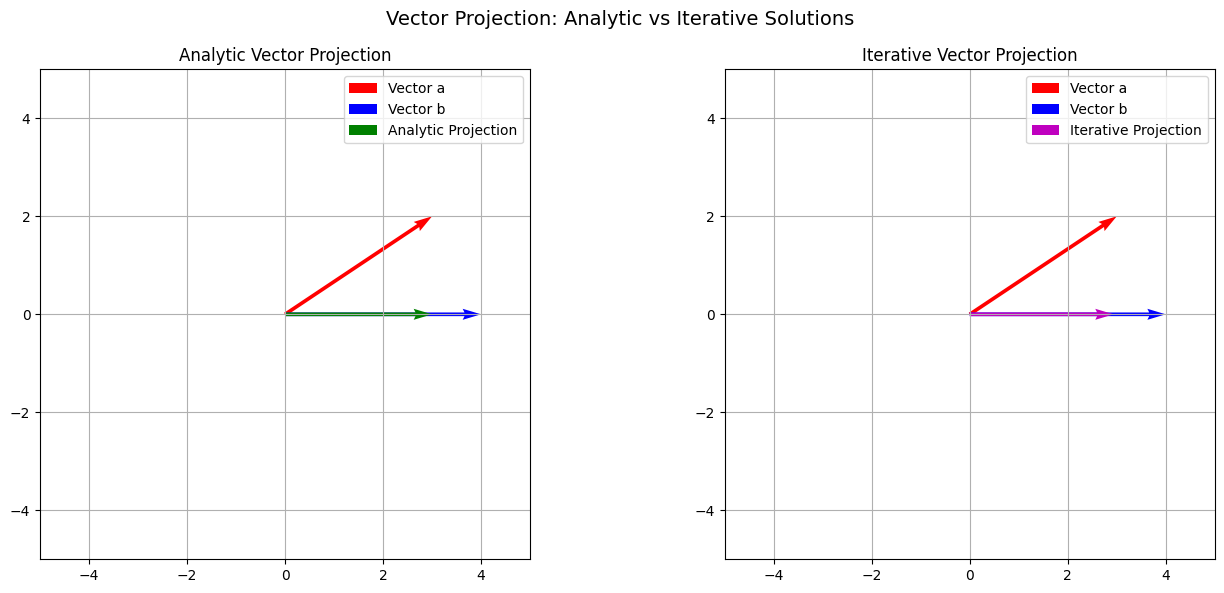

In [29]:
# 1. Compare the scalar projections
scalar_difference = scalar_projection - scalar_projection_iterative
print(f"Difference between analytic and iterative scalar projections: {scalar_difference}")

# 2. Create a matplotlib figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --------- Subplot 1: Analytic Projection ---------
ax1.quiver(0, 0, vector_a[0], vector_a[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector a')
ax1.quiver(0, 0, vector_b[0], vector_b[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector b')

ax1.quiver(0, 0, vector_projection_analytic[0], vector_projection_analytic[1],
           angles='xy', scale_units='xy', scale=1, color='g', label='Analytic Projection')

ax1.set_title("Analytic Vector Projection")
ax1.set_aspect('equal', adjustable='box')
ax1.grid(True)
ax1.legend()

# Set same limits for both plots
max_limit = max(
    np.max(np.abs(vector_a)),
    np.max(np.abs(vector_b)),
    np.max(np.abs(vector_projection_analytic)),
    np.max(np.abs(vector_projection_iterative))
) + 1
ax1.set_xlim([-max_limit, max_limit])
ax1.set_ylim([-max_limit, max_limit])

# --------- Subplot 2: Iterative Projection ---------
ax2.quiver(0, 0, vector_a[0], vector_a[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector a')
ax2.quiver(0, 0, vector_b[0], vector_b[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector b')

ax2.quiver(0, 0, vector_projection_iterative[0], vector_projection_iterative[1],
           angles='xy', scale_units='xy', scale=1, color='m', label='Iterative Projection')

ax2.set_title("Iterative Vector Projection")
ax2.set_aspect('equal', adjustable='box')
ax2.grid(True)
ax2.legend()

ax2.set_xlim([-max_limit, max_limit])
ax2.set_ylim([-max_limit, max_limit])

# Show figure
plt.suptitle("Vector Projection: Analytic vs Iterative Solutions", fontsize=14)
plt.tight_layout()
plt.show()

##Construcción de la curva iterativa
Se plantea una función de costo de la forma: $\parallel Xn - α*Xm\parallel^{2}$. Por medio de esta función de costo se dibuja el progreso del modelo para encontrar el mínimo posible para la realización de la proyección entre vectores.

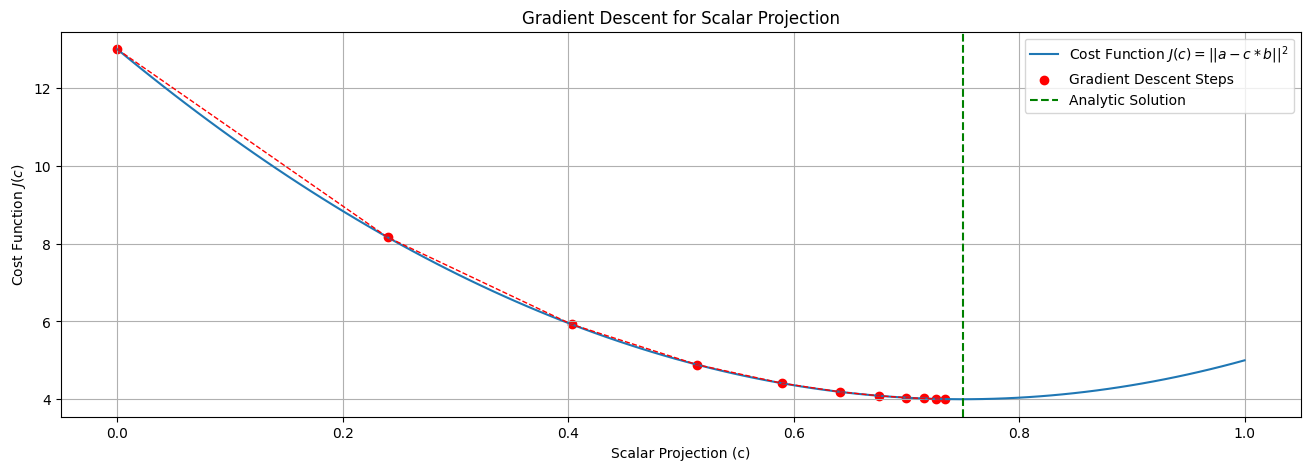

In [30]:
# Define the cost function J(c) = ||a - c*b||^2
def cost_function(c, a, b):
  return np.sum((a - c * b)**2)

# Generate a range of scalar values 'c' to plot the cost function
c_values = np.linspace(0, 1, 100)  # Adjust the range as needed
cost_values = [cost_function(c, vector_a, vector_b) for c in c_values]

# Plot the cost function
plt.figure(figsize=(16, 5))
plt.plot(c_values, cost_values, label='Cost Function $J(c) = ||a - c*b||^2$')

# Plot the gradient descent trajectory
plt.scatter(scalar_projection_history, [cost_function(c, vector_a, vector_b) for c in scalar_projection_history], color='red', label='Gradient Descent Steps')
plt.plot(scalar_projection_history, [cost_function(c, vector_a, vector_b) for c in scalar_projection_history], color='red', linestyle='--', linewidth=1)


# Mark the analytic solution on the plot
plt.axvline(x=scalar_projection, color='green', linestyle='--', label='Analytic Solution')

# Add labels and title
plt.xlabel('Scalar Projection (c)')
plt.ylabel('Cost Function $J(c)$')
plt.title('Gradient Descent for Scalar Projection')
plt.legend()
plt.grid(True)
plt.show()

#Proyección lineal de Imágenes

##Librerias

In [6]:
import cv2
from google.colab.patches import cv2_imshow
!git clone https://github.com/FelipeFerAl/TAM-2025-2.git

Cloning into 'TAM-2025-2'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 63 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 3.92 MiB | 21.03 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [31]:
def image_processing(path, size=(200,200)):
  """
  Función para leer la imagen de una ruta específica y
  aplanarla para trabajarla como vector
  Entrada:
  "path" - Ruta del archivo
  "size" - Tamaño estándar planteado (200,200)
  Salida:
  "vec" - Imagen vectorizada
  """
  img = cv2.imread(path, cv2.IMREAD_COLOR_RGB)  #Lectura de la imagen
  img = cv2.resize(img, size) #Escalamiento para menor procesamiento
  vec = img.astype(float).flatten() #Vectorización de la imagen
  return vec

##Lectura de Imágenes
Se procesan las imágenes en base a la ruta dada y se regresan en las líneas 4 y 5 completamente vectorizadas mientras se halla la solución analítica

In [32]:
imagen1 = '/content/TAM-2025-2/FastWorks/Task1Images/Task2.1.png'
imagen2 = '/content/TAM-2025-2/FastWorks/Task1Images/Task2.2.png'

vec1 = image_processing(imagen1)
vec2 = image_processing(imagen2)

dot_product_ab = np.dot(vec1, vec2)
dot_product_bb = np.dot(vec2, vec2)

scalar_projection = dot_product_ab / dot_product_bb

In [37]:
scalar_projection_iterative = 0.0
scalar_projection_history = [scalar_projection_iterative] # Store initial value

learning_rate = 0.1 / (np.linalg.norm(vec1, 2) ** 2)

num_iterations = 20

for i in range(num_iterations):
  gradient = -2 * np.dot((vec1 - scalar_projection_iterative * vec2), vec2)

  scalar_projection_iterative = scalar_projection_iterative - learning_rate * gradient

  scalar_projection_history.append(scalar_projection_iterative)


vector_projection_iterative = scalar_projection_iterative * vec2

scalar_difference = scalar_projection - scalar_projection_iterative

In [38]:
print(f"Scalar projection of a onto b (analytic):{scalar_projection}")
print(f"Scalar projection of a onto b (iterative):{scalar_projection_iterative}")
print(f"Difference between analytic and iterative scalar projections: {scalar_difference}")

Scalar projection of a onto b (analytic):0.9059981518758804
Scalar projection of a onto b (iterative):0.8881721889524656
Difference between analytic and iterative scalar projections: 0.017825962923414762


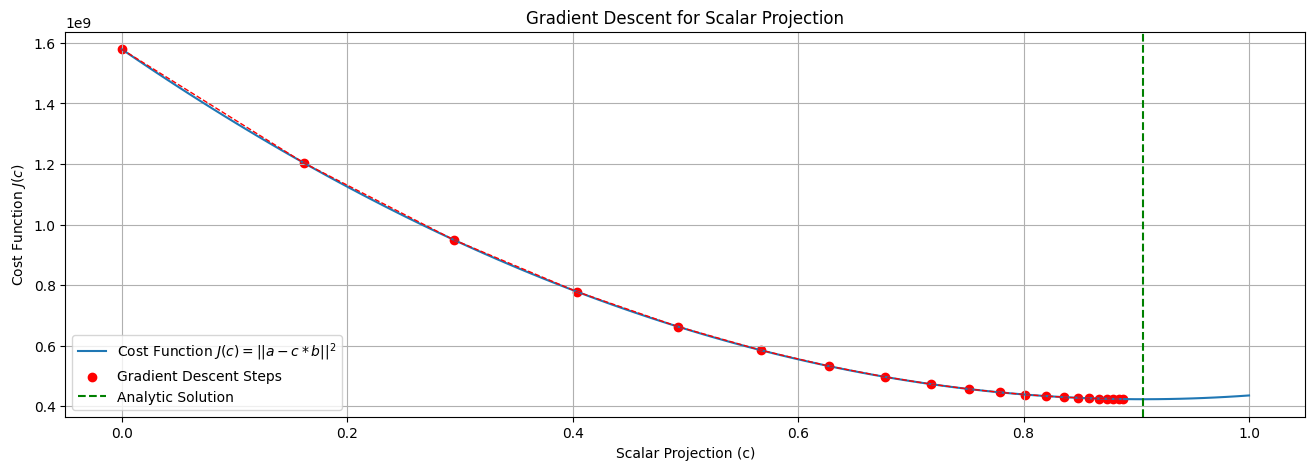

In [39]:
# Define the cost function J(c) = ||a - c*b||^2
def cost_function(c, a, b):
  return np.sum((a - c * b)**2)

# Generate a range of scalar values 'c' to plot the cost function
c_values = np.linspace(0, 1, 100)  # Adjust the range as needed
cost_values = [cost_function(c, vec1, vec2) for c in c_values]

# Plot the cost function
plt.figure(figsize=(16, 5))
plt.plot(c_values, cost_values, label='Cost Function $J(c) = ||a - c*b||^2$')

# Plot the gradient descent trajectory
plt.scatter(scalar_projection_history, [cost_function(c, vec1, vec2) for c in scalar_projection_history], color='red', label='Gradient Descent Steps')
plt.plot(scalar_projection_history, [cost_function(c, vec1, vec2) for c in scalar_projection_history], color='red', linestyle='--', linewidth=1)


# Mark the analytic solution on the plot
plt.axvline(x=scalar_projection, color='green', linestyle='--', label='Analytic Solution')

# Add labels and title
plt.xlabel('Scalar Projection (c)')
plt.ylabel('Cost Function $J(c)$')
plt.title('Gradient Descent for Scalar Projection')
plt.legend()
plt.grid(True)
plt.show()